# Spoken Language Processing in Python: Natural Language processing

This notebook is based on DataCamp Course 'Spoken Language Processing in Python'. Several ways to import, process, transform and transcribe speech and audio files is mentioned.

# Create wave object and convert frames as bytes

In [1]:
# import wave and matplotlib.pyplot
import wave
import matplotlib.pyplot as plt

# Create audio file wave object
good_morning = wave.open('good_morning.wav', 'r')

# Read all frames from wave object(convert into bytes) 
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


In [2]:
import numpy as np

# Open good morning sound wave and read frames as bytes
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm[:10])

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11]


# Finding timestamps

In [3]:
# Read in sound wave and convert from bytes to integers
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm, num=len(soundwave_gm))

# Print the first 10 timestamps
print(time_gm[:10])

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]


In [4]:
# Read in sound wave and convert from bytes to integers
good_afternoon = wave.open('good_afternoon.wav', 'r')
signal_ga= good_afternoon.readframes(-1)
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')

# Get the sound wave frame rate
framerate_ga = good_afternoon.getframerate()

# Find the sound wave timestamps
time_ga = np.linspace(start=0,
                      stop=len(soundwave_ga)/framerate_ga, num=len(soundwave_ga))

# Print the first 10 timestamps
print(time_ga[:10])

[0.00000000e+00 2.08333960e-05 4.16667921e-05 6.25001881e-05
 8.33335841e-05 1.04166980e-04 1.25000376e-04 1.45833772e-04
 1.66667168e-04 1.87500564e-04]


# Visualizing Soundwaves

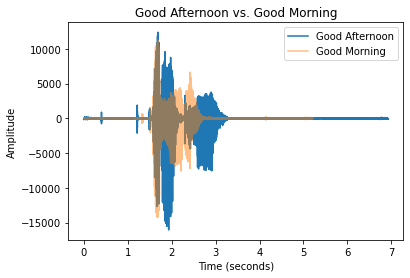

In [5]:
# same above preprocessing is done to good afternoon audio
# Setup the title and axis titles
plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot
plt.plot(time_gm, soundwave_gm, label='Good Morning',
   # Set the alpha variable to 0.5 to make good morning graph a bit transparent
   alpha=0.5)

plt.legend()
plt.show()

# Speech Recognition

In [6]:
# Importing the speech_recognition library
import speech_recognition as sr

# Create an instance of the Recognizer class
recognizer = sr.Recognizer()

# Set the energy threshold, this is minimum threshold for speech, below that it is considered silence, 
#usually a queit room is b/w 0-100
recognizer.energy_threshold = 300

# Convert AudioFile to AudioData

In [7]:
# Instantiate Recognizer
recognizer = sr.Recognizer()

# Convert audio to AudioFile
clean_support_call = sr.AudioFile('clean_support_call.wav')

# Convert AudioFile to AudioData
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source)

# Transcribe AudioData to text
text = recognizer.recognize_google(clean_support_call_audio, language="en-US")
print(text)

hello I want to get some help setting up my time please


In [8]:
# Convert AudioFile to AudioData
nothing_at_end= sr.AudioFile('30-seconds-of-nothing-16k.wav')
with nothing_at_end as source:
    nothing_at_end_audio = recognizer.record(source,
                                             duration=10,
                                             offset=None)

# Transcribe AudioData to text
text = recognizer.recognize_google(nothing_at_end_audio,
                                   language="en-US")

print(text)

this Odia call has 30 seconds of nothing at the end


In [9]:
# Pass the Japanese audio to recognize_google
japanese_gm = sr.AudioFile('good_morning_japanense.wav')
with japanese_gm as source:
    japanese_audio = recognizer.record(source)

text = recognizer.recognize_google(japanese_audio, language='ja')

# Print the text
print(text)

おはようございます


# Multiple speakers

In [10]:
# Create a recognizer class
recognizer = sr.Recognizer()

multiple_speakers = sr.AudioFile('multiple-speakers-16k.wav')

with multiple_speakers as source:
    multiple_speakers_audio = recognizer.record(source)

# Recognize the multiple speaker AudioData
text = recognizer.recognize_google(multiple_speakers_audio,language="en-US")

# Print the text
print(text)

limitations of the speech recognition library different speakers am voices was one property tax


Note: recognize_google can recognize only one speaker. Other paid APIs can be used to split multiple speakers.

# Play and Adjust Frame Rate of Audiosegment

In [31]:
# Import AudioSegment and play
from pydub import AudioSegment
from pydub.playback import play

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="wav_file.wav",format="wav")

# Find the frame rate
print(wav_file.frame_rate)

print(wav_file.channels)
print(wav_file.max)

# Create a new wav file with adjusted frame rate
wav_file_16k = wav_file.set_frame_rate(16000)

# Check the frame rate of the new wav file
print(wav_file_16k.frame_rate)

48000
2
8484
16000


# Adjusting the Volume of Audio files

In [41]:
# Import AudioSegment and normalize
from pydub import AudioSegment
from pydub.effects import normalize
# Import audio file
volume_adjusted = AudioSegment.from_file('volume_adjusted.wav')

# Lower the volume by 60 dB
quiet_volume_adjusted = volume_adjusted - 60

# Segment and Joining Two Audio Files

In [61]:
from pydub import AudioSegment

# Import part 1 and part 2 audio files
part_1 = AudioSegment.from_file('part_1.wav')
part_2 = AudioSegment.from_file('part_2.wav')

# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2

# Spliting Stereo audio files to seperate channels

In [42]:
# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file("stereo_call.wav")
print(f"Stereo number channels: {stereo_phone_call.channels}")

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]

Stereo number channels: 2
Split number channels: 1, 1


# Converting audio to the right format

## References

 DataCamp Course 'Spoken Language Processing in Python' by Daniel Bourke